In [1]:
from IPython.display import HTML
HTML("<h2>TV朝日　資料率推移</h2>")
"""
参考資料
http://www.tv-asahihd.co.jp/contents/ir_setex/
"""
pass

In [2]:
# 基本のライブラリを読み込む
import numpy as np
import pandas as pd
from scipy import stats
 
# グラフ描画
from matplotlib import pylab as plt
import seaborn as sns
%matplotlib inline
 
 
# グラフを横長にする
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

import matplotlib as mpl
mpl.rcParams['font.family'] = ['serif']

In [3]:
# CSV ファイルを読み込み(1)
url = "/usr/local/zeppelin/work/02_timeseries/tvasahi201701.txt"
file2 = "/usr/local/zeppelin/work/02_timeseries/tvasahi201701_2.txt"
dataNormal = pd.read_csv(url)
dataNormal.head()

,time,2010-04-01,2010-07-01,2010-10-01,2011-01-01,2011-04-01,2011-07-01,2011-10-01,2012-01-01,2012-04-01,...,2014-10-01,2015-01-01,2015-04-01,2015-07-01,2015-10-01,2016-01-01,2016-04-01,2016-07-01,2016-10-01,2017-01-01
0,全日,7.3,7.1,7.2,7.5,7.1,7.3,7.6,7.7,7.9,...,7.2,7.3,6.7,6.9,7.4,7.6,7.2,7.0,7.6,7.6
1,ゴールデン,11.6,10.7,11.7,12.0,10.9,11.3,12.4,12.2,12.3,...,11.7,11.7,10.6,10.2,11.4,10.9,10.1,9.6,11.0,10.5
2,プライム,12.2,11.3,12.1,12.5,11.5,11.7,12.5,12.5,12.7,...,11.9,12.0,10.8,10.6,11.5,11.1,10.5,10.1,11.0,10.7
3,プライム2,8.8,8.2,9.0,10.1,8.4,8.2,8.2,8.3,8.6,...,7.4,7.4,6.7,6.8,6.8,7.5,6.7,6.3,6.2,6.2


In [4]:
#ts = ((dataNormal.T)[0])
ts = ((dataNormal.T)[2])
print(ts)
ts.to_csv(file2)

time          プライム
2010-04-01    12.2
2010-07-01    11.3
2010-10-01    12.1
2011-01-01    12.5
2011-04-01    11.5
2011-07-01    11.7
2011-10-01    12.5
2012-01-01    12.5
2012-04-01    12.7
2012-07-01    11.6
2012-10-01    13.2
2013-01-01    13.1
2013-04-01    12.1
2013-07-01    11.4
2013-10-01    12.8
2014-01-01    12.3
2014-04-01    10.8
2014-07-01    10.6
2014-10-01    11.9
2015-01-01      12
2015-04-01    10.8
2015-07-01    10.6
2015-10-01    11.5
2016-01-01    11.1
2016-04-01    10.5
2016-07-01    10.1
2016-10-01      11
2017-01-01    10.7
Name: 2, dtype: object


In [5]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-01')
ts = pd.read_csv(file2, index_col="time", date_parser=dateparse, dtype='float')
ts.head()

,プライム
time,
2010-04-01,12.2
2010-07-01,11.3
2010-10-01,12.1
2011-01-01,12.5
2011-04-01,11.5


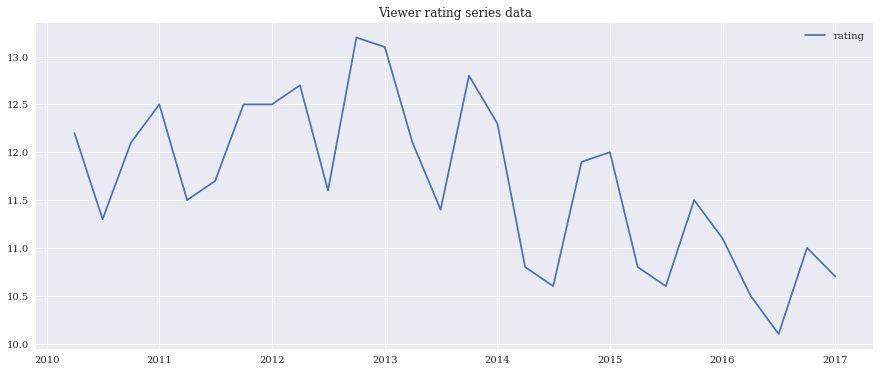

In [6]:
plt.plot(ts, label='rating')
plt.title('Viewer rating series data')
plt.legend(loc='best')

In [7]:
from statsmodels.tsa.stattools import adfuller

# Dickey-Fuller test 結果と標準偏差、平均のプロット
def test_stationarity(timeseries, window_size=12):
    # Determing rolling statistics
    rolmean = timeseries.rolling(window=window_size,center=False).mean()
    rolstd = timeseries.rolling(window=window_size,center=False).std()

    # Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value',
                                             '#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

/root/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


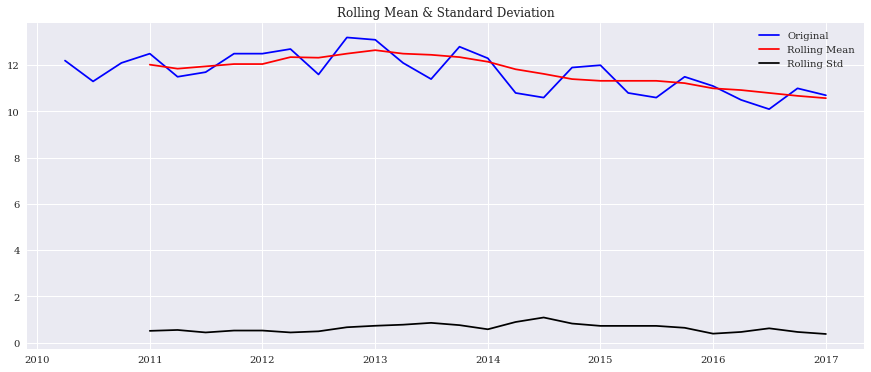

Results of Dickey-Fuller Test:


ValueError: too many values to unpack (expected 2)

In [8]:
test_stationarity(ts, window_size=4)

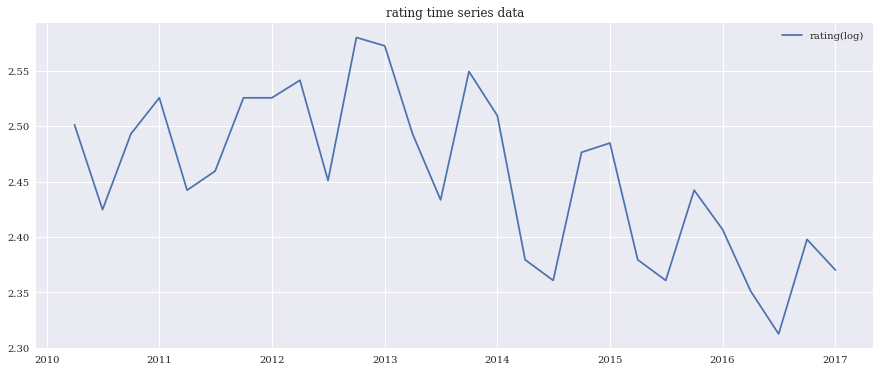

In [9]:
"""
対数をとって傾向を確認
"""
ts_log = np.log(ts)
plt.plot(ts_log, label='rating(log)')
plt.title('rating time series data')
plt.legend(loc='best')

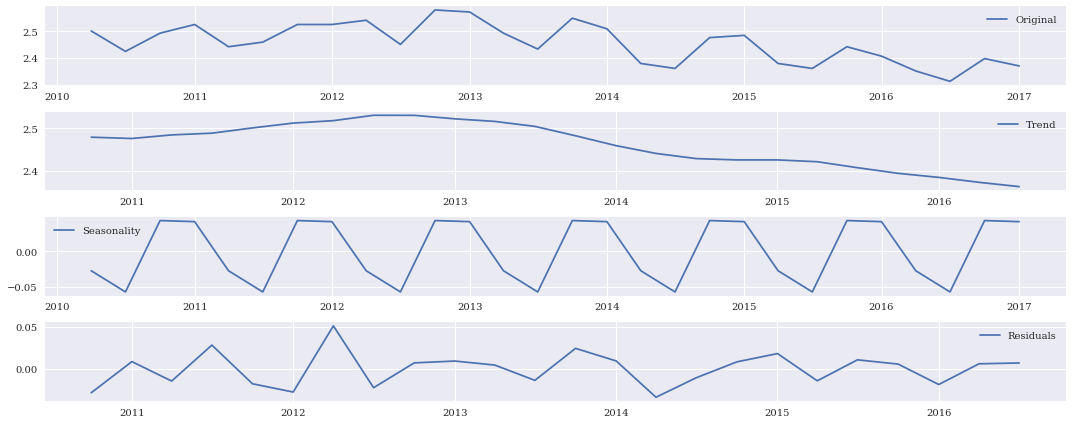

In [10]:
# 傾向(trend)、季節性(seasonal)、残差(residual)に分解してモデル化する。
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid


# オリジナルの時系列データプロット
plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
 
# trend のプロット
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
 
# seasonal のプロット
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
 
# residual のプロット
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

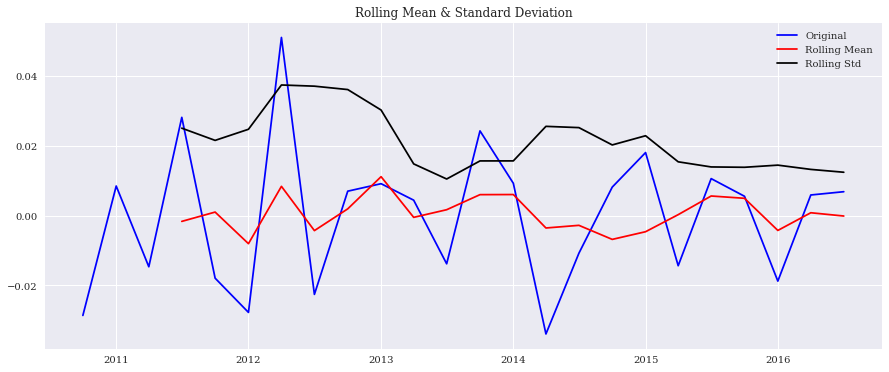

Results of Dickey-Fuller Test:


ValueError: too many values to unpack (expected 2)

In [11]:
"""
傾向、季節性がデータから分離され、残差をモデル化できることがわかる。
そこで、残差の定常性をチェックできる。
"""
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose, window_size=4)

In [12]:
ts_log_diff = ts_log - ts_log.shift()

#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

/root/anaconda3/lib/python3.6/site-packages/numpy/linalg/linalg.py:1591: RuntimeWarning: invalid value encountered in greater
  return sum(S > tol)


LinAlgError: SVD did not converge

In [13]:
# 総当たりで、AICが最小となるSARIMAの次数を探す
max_p = 3
max_q = 3
max_d = 1
max_sp = 1
max_sq = 1
max_sd = 1

pattern = max_p*(max_q + 1)*(max_d + 1)*(max_sp + 1)*(max_sq + 1)*(max_sd + 1)

modelSelection = pd.DataFrame(index=range(pattern), columns=["model", "aic"])
pattern

192

In [14]:
import statsmodels.api as sm

# 自動SARIMA選択
num = 0

for p in range(1, max_p + 1):
    for d in range(0, max_d + 1):
        for q in range(0, max_q + 1):
            for sp in range(0, max_sp + 1):
                for sd in range(0, max_sd + 1):
                    for sq in range(0, max_sq + 1):
                        sarima = sm.tsa.SARIMAX(
                            ts, order=(p,d,q), 
                            seasonal_order=(sp,sd,sq,4), 
                            enforce_stationarity = False, 
                            enforce_invertibility = False
                        ).fit()
                        modelSelection.iloc[num]["model"] = "order=(" + str(p) + ","+ str(d) + ","+ str(q) + "), season=("+ str(sp) + ","+ str(sd) + "," + str(sq) + ")"
                        modelSelection.iloc[num]["aic"] = sarima.aic
                        num = num + 1

/root/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/root/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/root/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/root/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/root/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "

In [15]:
# モデルごとの結果確認
print(modelSelection)
# AIC最小モデル
print(modelSelection[modelSelection.aic == min(modelSelection.aic)])

                             model      aic
0    order=(1,0,0), season=(0,0,0)  70.3877
1    order=(1,0,0), season=(0,0,1)  48.7876
2    order=(1,0,0), season=(0,1,0)  40.1175
3    order=(1,0,0), season=(0,1,1)  27.9964
4    order=(1,0,0), season=(1,0,0)   40.728
5    order=(1,0,0), season=(1,0,1)  37.2894
6    order=(1,0,0), season=(1,1,0)  30.3103
7    order=(1,0,0), season=(1,1,1)   29.522
8    order=(1,0,1), season=(0,0,0)  62.5256
9    order=(1,0,1), season=(0,0,1)  43.3847
10   order=(1,0,1), season=(0,1,0)  37.7301
11   order=(1,0,1), season=(0,1,1)  26.0388
12   order=(1,0,1), season=(1,0,0)  41.8186
13   order=(1,0,1), season=(1,0,1)  32.2768
14   order=(1,0,1), season=(1,1,0)  31.8695
15   order=(1,0,1), season=(1,1,1)  28.0252
16   order=(1,0,2), season=(0,0,0)  57.7646
17   order=(1,0,2), season=(0,0,1)  40.7138
18   order=(1,0,2), season=(0,1,0)  36.0716
19   order=(1,0,2), season=(0,1,1)  25.3384
20   order=(1,0,2), season=(1,0,0)  42.2375
21   order=(1,0,2), season=(1,0,

In [16]:
p=1
d=1
q=3
sp=0
sd=1
sq=1

sarima = sm.tsa.SARIMAX(
    ts, order=(p,d,q), 
    seasonal_order=(sp,sd,sq,4), 
    enforce_stationarity = False, 
    enforce_invertibility = False
).fit()
# 結果確認
print(sarima.summary())

                                 Statespace Model Results                                
Dep. Variable:                              プライム   No. Observations:                   28
Model:             SARIMAX(1, 1, 3)x(0, 1, 1, 4)   Log Likelihood                  -4.081
Date:                           Sat, 26 Aug 2017   AIC                             20.162
Time:                                   10:16:53   BIC                             28.155
Sample:                               04-01-2010   HQIC                            22.605
                                    - 01-01-2017                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7597   2.03e+06   3.74e-07      1.000   -3.99e+06    3.99e+06
ma.L1         -1.2405      0.000  -5216.846

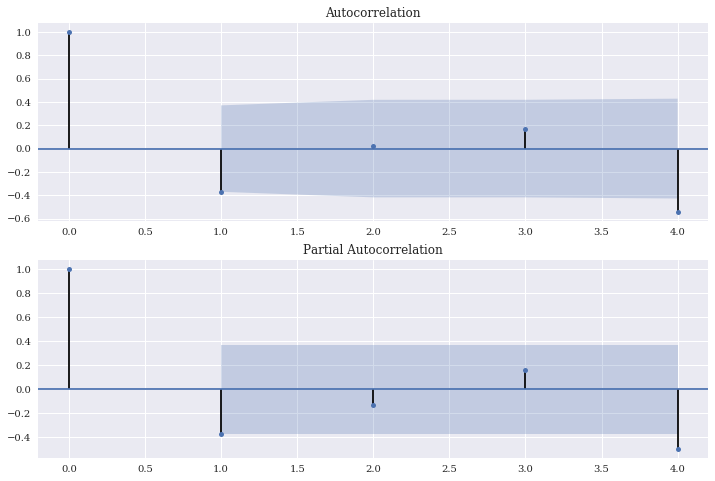

In [17]:
# 残差のチェック
residSARIMA = sarima.resid
fig = plt.figure(figsize=(12,8))

# 自己相関
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(residSARIMA, lags=4, ax=ax1)

# 偏自己相関
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(residSARIMA, lags=4, ax=ax2)

# 残差の自己相関については、ほぼ問題なくなったことを確認

2015-01-01    11.601939
2015-04-01    10.927707
2015-07-01    10.164144
2015-10-01    11.711078
2016-01-01    11.266165
2016-04-01    10.183324
2016-07-01     9.949642
2016-10-01    11.106567
2017-01-01    10.775023
2017-04-01     9.803198
2017-07-01     9.344881
2017-10-01    10.452862
Freq: QS-OCT, dtype: float64


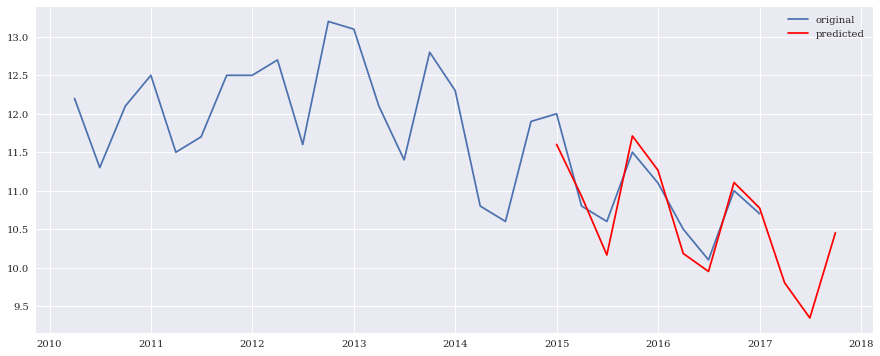

In [18]:
# 予測
ts_pred = sarima.predict('2015-01-01', '2017-12-01')

# 実データと予測結果の図示
plt.plot(ts, label='original')
plt.plot(ts_pred, label='predicted', color='red')
plt.legend(loc='best')

print(ts_pred)